
## Proyecto Investigativo
---

**Questions:**
- Top 5 equipos que mas goles han metido de visitante 
- Estadistica de los top 5 equipos que han metido mas goles en los ultimos 7 años de champions.
- Estadios los que mas partidos de champions se han jugado. 
- Equipos que mas se han quedado en fase de grupos en los ultimos 7 años.

![enter image description here](https://sevillafc.es/sites/default/files/news/image/champions2021.jpg)

---

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;


In [3]:
#Leyendo DFS (Paso 3) 
dfs = {

    "2017": pd.DataFrame(),
    "2018": pd.DataFrame(),
    "2019": pd.DataFrame(),
    "2020": pd.DataFrame(),
    "2021": pd.DataFrame(),
    "2022": pd.DataFrame(),
    "2023": pd.DataFrame(),
}

for year in range(2017, 2024):

    dfs[str(year)] = pd.read_csv(f"./resources/champions-league-{year}.csv")


In [4]:
# Extrayendo valores de las columnas (Data Cleaning ):

for year in range(2017, 2024):

    #Limpiar valores NaN
    dfs[str(year)].dropna(subset='Result',how='any', inplace=True);

    # Columna Home Team Goals
    dfs[str(year)]['Home Team Goals'] = dfs.get(str(year))['Result'].str.split(" - ").str[0].astype(int)

    # Columna Away Team Goals
    dfs[str(year)]['Away Team Goals'] = dfs.get(str(year))['Result'].str.split(" - ").str[1].astype(int)

    # Eliminando columna que ya no usaremos
    dfs[str(year)].drop('Result', axis=1,inplace=True);
    


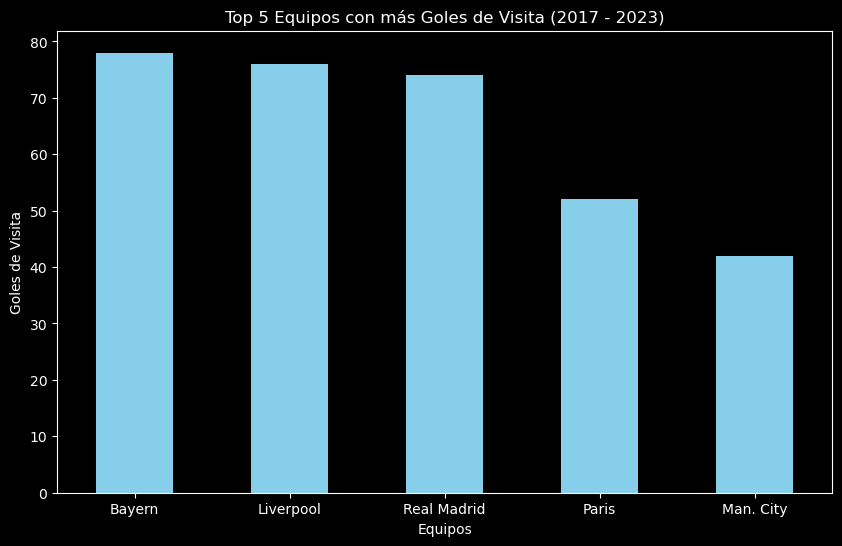

In [5]:
# Top 5 equipos que mas goles de visita han metido en los ultimos 7 años

AwayTeamTop = pd.Series()

for year in range(2017, 2024):
    teams = dfs[str(year)].groupby('Away Team')['Away Team Goals'].sum()

    #El fill value es para realizar la suma y cuando se encuentre con un valor nulo no lo sume simplemente
    AwayTeamTop = AwayTeamTop.add(teams, fill_value=0).astype(int)

AwayTeamTop = AwayTeamTop.sort_values(ascending=False).head(5)



plt.style.use('dark_background')
plt.figure(figsize=(10, 6))  
AwayTeamTop.plot(kind='bar', color='skyblue')
plt.title('Top 5 Equipos con más Goles de Visita (2017 - 2023)')
plt.xlabel('Equipos')
plt.ylabel('Goles de Visita')
plt.xticks(rotation=0)  
plt.show()




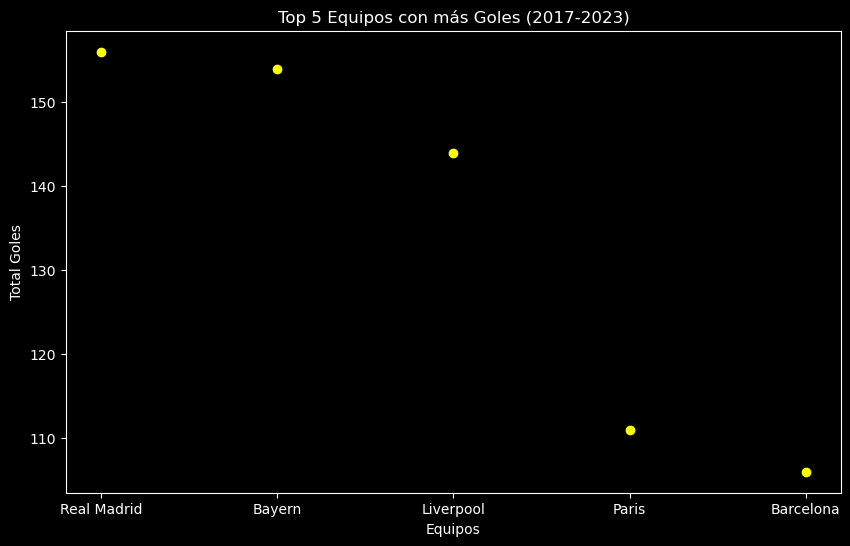

In [6]:

# Top 5 equipos que mas goles de visita han metido en los ultimos 7 años


TeamsTop = pd.Series()

for year in range(2017, 2024):

    teams = dfs[str(year)].groupby('Away Team')['Away Team Goals'].sum()
    TeamsTop= TeamsTop.add(teams, fill_value=0).astype(int)

    teams = dfs[str(year)].groupby('Home Team')['Home Team Goals'].sum()
    TeamsTop= TeamsTop.add(teams, fill_value=0).astype(int)

TeamsTop= TeamsTop.sort_values(ascending=False).head(5)

# Convertimos el dato de Tipo de Series a un DF con el constructor
TeamsTop= pd.DataFrame(TeamsTop.sort_values(ascending=False).head(5), columns=['Total Goles'])


# Creamos un grafico de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(TeamsTop.index, TeamsTop['Total Goles'], color='yellow')
plt.title('Top 5 Equipos con más Goles (2017-2023)')
plt.xlabel('Equipos')
plt.ylabel('Total Goles')
plt.xticks(rotation=0)
plt.show()



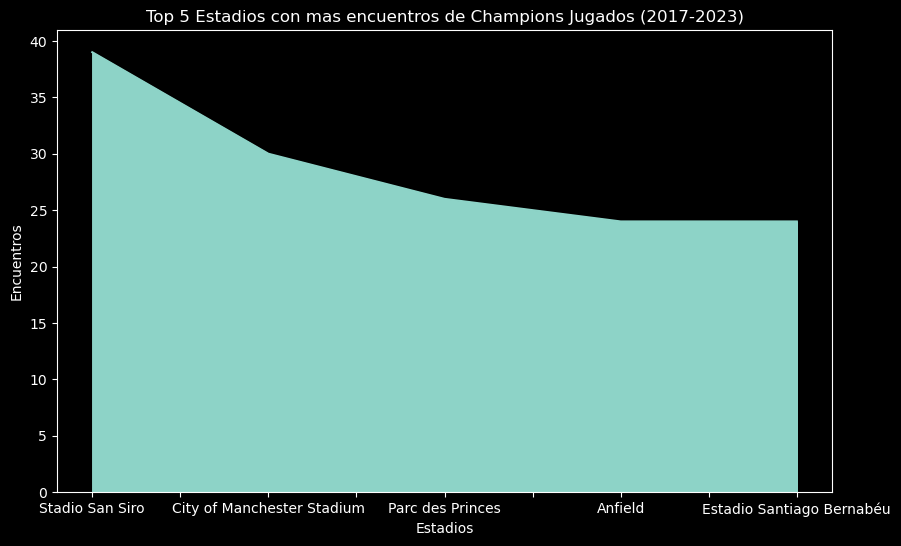

In [11]:
# Top estadios en los que mas se ha jugado la champions

stadiumsTop = pd.Series()

for year in range(2017, 2024):
    sumStadia = dfs[str(year)].groupby('Location')['Date'].count()
    stadiumsTop = stadiumsTop.add(sumStadia, fill_value=0).astype(int)
    
    
stadiumsTop = stadiumsTop.sort_values(ascending=False).head(5);


# Creamos un grafico de dispersion
plt.figure(figsize=(10, 6))
stadiumsTop.plot(kind='area')
plt.title('Top 5 Estadios con mas encuentros de Champions Jugados (2017-2023)')
plt.xlabel('Estadios')
plt.ylabel('Encuentros')
plt.xticks(rotation=0)
plt.show()




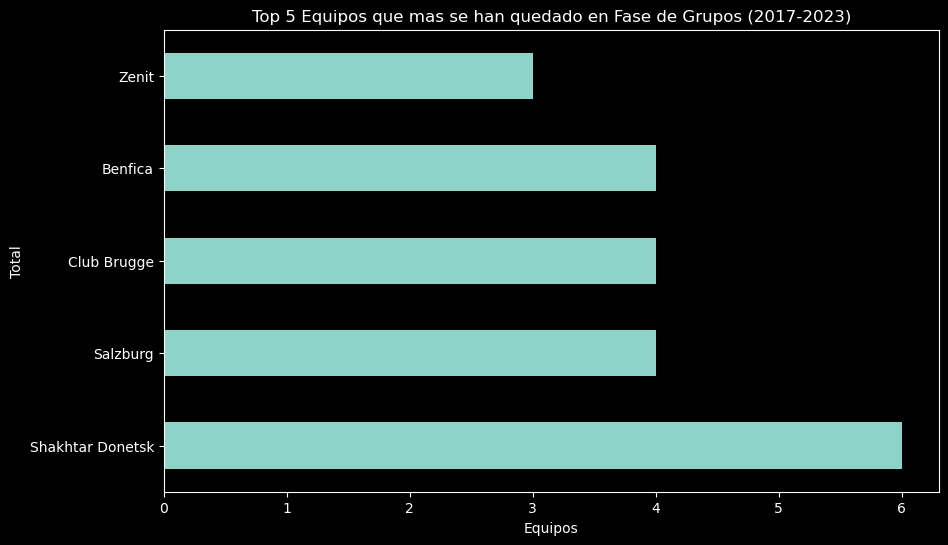

In [8]:

equiposFaseGrupos = []


for year in range(2017, 2024):

    rounds = list(dfs[str(year)]["Round Number"].unique())
    rounds = [element for element in rounds if(not str(element).isdigit())]

    fasegrupos = dfs[str(year)].query("`Round Number`.isin(['1', '2', '3', '4', '5', '6'])")[["Away Team", "Home Team"]]
    fasegrupos = fasegrupos.stack().unique().tolist()

    clasificados = dfs[str(year)].query("`Round Number`.isin(@rounds)")[["Away Team", "Home Team"]]
    clasificados = clasificados.stack().unique().tolist();


    for equipo in fasegrupos:
        if equipo not in clasificados:
            equiposFaseGrupos.append({"Equipos": equipo})


equiposFaseGrupos = pd.DataFrame(equiposFaseGrupos)

equiposFaseGrupos = equiposFaseGrupos.groupby("Equipos")["Equipos"].count()\
                    .sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
equiposFaseGrupos.plot(kind='barh')
plt.title('Top 5 Equipos que mas se han quedado en Fase de Grupos (2017-2023)')
plt.xlabel('Equipos')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()
 



## Conclusiones:
Segun lo manejado podemos observar resultados relevantes para una gran mayoria de publico
al que va dirigido, teniendo siempre segun las estadisticas al menos un equipo o lugar español en
la cima. Por otro lado, doy por hecho que estos analisis registrados son de gran interes
general para una parte publico español, y generando un gran impacto a nivel analitico visual. 

![enter image description here](https://editorial.uefa.com/resources/0246-0e98e0aed53b-074f228dc0a2-1000/format/wide1/ucl_branding.jpeg?imwidth=2048)
